In [15]:
import tszip
import pandas as pd
import numpy as np
import tszip
import sc2ts
import matplotlib_venn
import matplotlib.pyplot as plt
import seaborn as sns
from pangonet.pangonet import PangoNet

In [25]:
df_sc2ts = pd.read_csv("../data/recombinants.csv").set_index("recombinant")

In [96]:
pn = PangoNet().build(
    alias_key="../arg_postprocessing/pangonet_data/alias_key.json",
    lineage_notes="../arg_postprocessing/pangonet_data/lineage_notes.txt")

xbb_descendants = pn.get_descendants("XBB")

def compress_xbbs(lin_counts):
    ret = {"XBB": 0}
    for k, v in lin_counts.items():
        if k in xbb_descendants:
            ret["XBB"] += v
        else:
            ret[k] = v
    return ret


def add_x_lineages(df):
    d = {}
    for k, row in df.iterrows():
        d[k] = eval(row["pango_counts"])
        if "XBB" in d[k]:
            d[k] = compress_xbbs(d[k])
    df["pango_counts"] = d
    
    x_lineage_involved = dict()
    for k, row in df.iterrows():
        pango_counts = row["pango_counts"]
        x_lineage_involved[k] = False
        if any(lin.startswith("X") for lin in pango_counts.keys()):
            if len(pango_counts) >= 20:
                print("Filtering messy", pango_counts)
                continue
            if any((lin.startswith("XB") and "." in lin) for lin in pango_counts.keys()):
                # Manually filter out the de-novo XBB ones
                print("Filtering de-novo sub XBBs", pango_counts)
                continue
            x_lineage_involved[k] = True
    
    df["x_lineage_involved"] = x_lineage_involved
    return df

dfp3 = pd.read_csv("../arg_postprocessing/sc2ts_viridian_v1.2_ripples_p3.csv")
dfp4 = pd.read_csv("../arg_postprocessing/sc2ts_viridian_v1.2_ripples_p4.csv")

dfp3 = add_x_lineages(dfp3).set_index("usher_node")
dfp4 = add_x_lineages(dfp4).set_index("usher_node")

2025-10-06 11:55:18,968 INFO:Creating aliases.
2025-10-06 11:55:18,970 INFO:Creating network.
Filtering de-novo sub XBBs {'XBB.1.5.7': 1}
Filtering de-novo sub XBBs {'XBF.2': 2}
Filtering de-novo sub XBBs {'XBB.1.5': 1}
Filtering de-novo sub XBBs {'XBB.1.5.4': 2}
Filtering messy {'XBB': 2361, 'BL.1': 81, 'CH.1.1': 1484, 'BN.1.4': 87, 'BA.2.75': 63, 'BN.1.2': 97, 'BN.1.5': 296, 'CH.1.1.19': 161, 'BM.1.1': 42, 'CA.7': 69, 'BN.1.3.1': 267, 'CH.1.1.1': 462, 'BN.1': 235, 'CH.1.1.2': 247, 'DV.2': 44, 'DV.6': 457, 'BM.1.1.3': 130, 'BA.2.75.5': 117, 'BL.2': 31, 'CB.1': 24, 'BN.1.2.1': 103, 'DV.3': 128, 'BN.1.3.5': 9, 'CH.1.1.13': 106, 'BR.2.1': 79, 'CH.1.1.11': 61, 'BN.3.1': 21, 'DV.3.1': 28, 'FJ.1': 37, 'BA.2.75.4': 17, 'BA.2.75.2': 294, 'CH.1.1.28': 58, 'XBF': 124, 'BN.1.3': 248, 'BY.1': 71, 'BN.1.7': 94, 'CJ.1.2': 26, 'CH.1.1.23': 4, 'BM.4.1.1': 75, 'BA.2.75.1': 147, 'BN.6': 35, 'CH.1.1.9': 62, 'XBF.4': 22, 'CH.1.1.8': 40, 'BA.2.75.7': 9, 'BA.2.75.3': 35, 'CJ.1.1': 6, 'CA.5': 21, 'CA.1': 47

We're assuming that the p4 is a superset of p3. This is alomost true. Let's ignore the handful of nodes that fail, as they are probably a result of the sampling from the se of events with identical samples.

In [103]:
dfp4.loc[list(set(dfp4.index) - set(dfp3.index))]

,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
usher_node,,,,,,,
node_322315,{'AY.20': 1},584330,1,-1,2147483648,1,False
node_660151,{'BA.2': 2},1113543,2,1113544,1,2,False
node_316747,{'AY.122': 1},471870,1,-1,2147483648,1,False
node_112982,{'AY.4': 2},698164,2,698164,0,2,False
node_562341,{'BA.5.1': 2},1288800,2,1288801,1,2,False
node_182175,{'AY.119': 1},894852,1,894853,1,1,False
node_179939,{'AY.113': 5},744529,6,710835,1,5,False
node_44179,"{'B.1.617.2': 2655, 'AY.35': 270, 'AY.48': 292}",238161,3219,-1,2147483648,3217,False
node_267578,{'AY.25.1': 2},408173,2,408173,0,2,False


In [107]:
dfp3["in_p4"] = dfp3.index.isin(dfp4.index)
dfp3["in_p4"].value_counts()

in_p4
False    2949
True     1162
Name: count, dtype: int64

In [108]:
dfp4.shape

(1174, 7)

## Distribution of numbers desdendants

For Ripples p3 and p4, small numbers of descendants dominate, with singletons accounting for over a half in all cases. Ripples p3 has more in all classes, with no one particular set of descendants dominating.

In [10]:

bins = list(range(1, 12)) + [100, 1000, 10000, 100_000, 1_000_000] 
str_bins = [f"{j}" for j in range(1, 11)] + ["10-100", "100-1000", "1000-10k", "10k-100k", "100k-1m"]
df = pd.DataFrame({"bins": bins[:-1], 
                   "Bin": str_bins,
                   "ripples_p3:": np.histogram(dfp3.usher_num_descendants.values, bins=bins)[0],
                   "ripples_p4:": np.histogram(dfp4.usher_num_descendants.values, bins=bins)[0],
                   "sc2ts": np.histogram(df_sc2ts.num_descendant_samples.values, bins=bins)[0]})
df

,bins,Bin,ripples_p3:,ripples_p4:,sc2ts
0,1,1,2616,757,525
1,2,2,575,178,124
2,3,3,232,65,47
3,4,4,124,38,32
4,5,5,74,14,17
5,6,6,65,17,11
6,7,7,48,9,10
7,8,8,37,11,8
8,9,9,22,6,4
9,10,10,21,5,5


In [83]:
df_lf = pd.melt(df, id_vars=["bins", "Bin"], var_name="Method", value_name="Count")

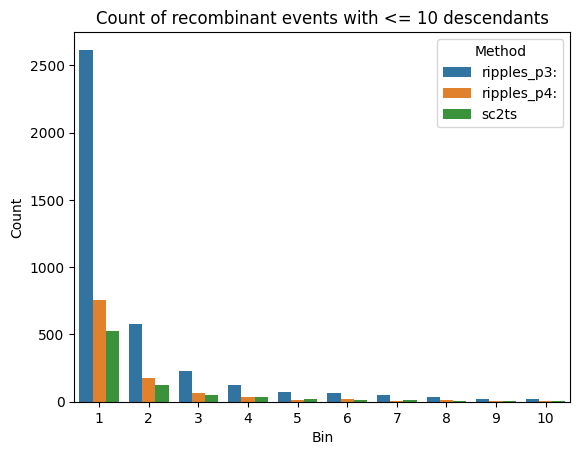

In [92]:
ax = sns.barplot(data=df_lf[df_lf["bins"] < 11], x="Bin", y="Count", hue="Method")
ax.set_title("Count of recombinant events with <= 10 descendants");

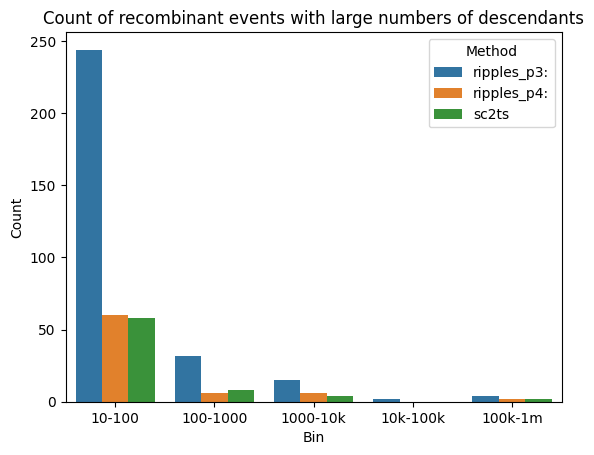

In [91]:
ax = sns.barplot(data=df_lf[df_lf["bins"] >= 11], x="Bin", y="Count", hue="Method");
ax.set_title("Count of recombinant events with large numbers of descendants");

## X lineages

In [116]:
dfp3_x = dfp3[dfp3["x_lineage_involved"]].reset_index()
dfp3_x

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved,in_p4
0,node_600484,{'XBR': 1},1420165,1,1420166,1,1,True,True
1,node_600480,"{'XBD': 30, 'XBR': 1, 'BA.2.75': 5}",1291791,7182,-1,2147483648,36,True,True
2,node_505768,{'XAC': 18},1219046,18,964555,4,18,True,True
3,node_633544,{'XY': 23},1192268,23,1187989,1,23,True,False
4,node_633571,{'XE': 1113},965352,1116,965353,1,1113,True,False
5,node_45191,{'XC': 5},414488,5,414488,0,5,True,True
6,node_633781,{'XL': 64},1034619,64,1034619,0,64,True,False
7,node_633519,"{'BA.2': 4, 'XM': 4}",1093549,8,1003220,1,8,True,True
8,SRR19708375,{'XAM': 1},1242107,1,1058654,7,1,True,False
9,node_409296,{'XA': 39},122444,39,122444,0,39,True,True


In [117]:
dfp4_x = dfp4[dfp4["x_lineage_involved"]].reset_index()
dfp4_x 

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
0,node_600484,{'XBR': 1},1420165,1,1420166,1,1,True
1,node_600480,"{'XBD': 30, 'XBR': 1, 'BA.2.75': 5}",1291791,7182,-1,2147483648,36,True
2,node_505768,{'XAC': 18},1219046,18,964555,4,18,True
3,node_45191,{'XC': 5},414488,5,414488,0,5,True
4,node_633519,"{'XM': 4, 'BA.2': 4}",1093549,8,1003220,1,8,True
5,node_409296,{'XA': 39},122444,39,122444,0,39,True
6,node_516786,"{'XAJ': 18, 'BA.4': 1}",974731,45209,-1,2147483648,19,True
7,node_6681,"{'B.1': 219, 'XB': 192}",223240,411,-1,2147483648,411,True
8,node_600527,"{'XBM': 10, 'BF.3': 2}",1348822,12,1348822,0,12,True
9,node_505721,{'XS': 17},1000242,17,1000242,0,17,True


In [23]:
dfp4_x[dfp4_x["sc2ts_num_descendants"] != dfp4_x["usher_num_descendants"]]

,index,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
1,54,node_600480,"{'XBD': 30, 'XBR': 1, 'BA.2.75': 5}",1291791,7182,-1,2147483648,36,True
6,772,node_516786,"{'XAJ': 18, 'BA.4': 1}",974731,45209,-1,2147483648,19,True
10,1034,node_600488,"{'XBD': 30, 'BA.2.75': 5}",1291791,7182,-1,2147483648,35,True


In [24]:
dfp3_x[dfp3_x["sc2ts_num_descendants"] != dfp3_x["usher_num_descendants"]]

,index,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
1,178,node_600480,"{'XBD': 30, 'XBR': 1, 'BA.2.75': 5}",1291791,7182,-1,2147483648,36,True
4,571,node_633571,{'XE': 1113},965352,1116,965353,1,1113,True
11,2538,node_543116,{'XBB': 2361},1396207,6453,1396207,0,6452,True
13,2559,node_505720,"{'BA.1.15': 1, 'XS': 17, 'BA.1': 1, 'BA.1.1': 1}",220185,1061795,-1,2147483648,20,True
14,2755,node_516786,"{'XAJ': 18, 'BA.4': 1}",974731,45209,-1,2147483648,19,True
17,3285,node_633486,"{'XE': 1113, 'XH': 2, 'XJ': 68, 'XY': 23, 'BA....",791357,341822,-1,2147483648,1321,True
20,3646,node_600488,"{'XBD': 30, 'BA.2.75': 5}",1291791,7182,-1,2147483648,35,True


In [63]:
pango_x_events = pd.read_csv("../data/pango_x_events.csv").set_index("root")
mapping = pango_x_events["root_pango"].to_dict()
import collections
collections.Counter(mapping.values()).most_common(5)


[('XM', 4), ('XAC', 4), ('XAD', 2), ('XA', 1), ('XJ', 1)]

The mapping is messy here because of 3 X lineages which we need to disambiguate. There's only two XAD samples which are both under Xx. They don't show up in the RIPPLES results, so let's not worry about them


### XAC
XAC is really one event, it's just because of mislabelling in by Pangolin. The MRCA of the XACs really is the same node in both

In [64]:
ts = tszip.load("../data/sc2ts_viridian_v1.2.trees.tsz")
dfn = sc2ts.node_data(ts, inheritance_stats=False)
df_sample = dfn[dfn["is_sample"]]

In [65]:
df_xac = df_sample[df_sample["pango"] == "XAC"]
xac_mrca = ts.first().mrca(*df_xac["node_id"].values)
xac_mrca

1219046

In [66]:
dfp4[dfp4["pango_counts"] == {'XAC': 18}]

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
125,node_505768,{'XAC': 18},1219046,18,964555,4,18,True


In [68]:
{k: v for k, v in mapping.items() if v == "XAC"}

{1223586: 'XAC', 2744536: 'XAC', 1214068: 'XAC', 1235679: 'XAC'}

In [69]:
mapping = {k: v for k, v in mapping.items() if v != "XAC"}
mapping[xac_mrca] = "XAC"

### XM

XM is messy because we have 4 different events in the ARG. We call the major one XM, and then the minor ones XM1, 2, arbitrarily.

In [70]:
pango_x_events[pango_x_events["pango"] == "XM"]

,root_pango,root_mutations,root_type,pango_samples,non_pango_samples,closest_recombinant,closest_recombinant_path_len,closest_recombinant_time,closest_recombinant_descendants,pango
root,,,,,,,,,,
938900,XM,2,R,1,{},938900,0.0,0.0,{'XM': 1},XM
1003220,XM,0,R,26,"{'BA.2': 16, 'XAL': 3}",1003220,0.0,0.0,"{'XM': 26, 'BA.2': 16, 'XAL': 3}",XM
1158127,XM,1,R,1,{},1158127,0.0,0.0,{'XM': 1},XM
1158182,XM,6,R,1,{},1158182,0.0,0.0,{'XM': 1},XM


In [73]:
j = 1
for root, row in pango_x_events[pango_x_events["pango"] == "XM"].iterrows():
    if row["pango_samples"] == 1:
        mapping[root] = f"XM{j}"
        j += 1


In [74]:
collections.Counter(mapping.values()).most_common(5)

[('XAD', 2), ('XA', 1), ('XJ', 1), ('XB', 1), ('XAP', 1)]

In [77]:
# Remove the novel XBB.1 also
mapping = {k: v for k, v in mapping.items() if v not in ["XAD", "XBB.1"]}

In [79]:
assert len(set(mapping.values())) == len(mapping)
df_sc2ts["event_label"] = {k: mapping.get(k, "novel") for k in df_sc2ts.index}
df_sc2ts_x_events = df_sc2ts[df_sc2ts["event_label"] != "novel"]
df_sc2ts_x_events

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_scorpio,parent_mrca_time,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,event_label
recombinant,,,,,,,,,,,,,,,,,,,,,
1159411,ERR9444530,32,1,1,2833,4321,1,COVID-ARTIC-V4.1,4.1alt,2022-03-20,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,4,5,48,True,5,XW
1058654,ERR8691075,154,1,1,4322,5386,0,COVID-ARTIC-V4.1,4.1alt,2022-02-12,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,5,8,43,True,7,XQ
946761,ERR8076129,16,1,1,5387,6402,1,COVID-ARTIC-V4.1,4.1alt,2022-01-13,...,.,1120.059657,2020-01-28,True,6,6,74,True,6,XF
1083412,ERR9089519,3,1,1,5925,6513,3,COVID-ARTIC-V4.1,4.1alt,2022-02-19,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,3,9,38,True,7,XG
1034619,ERR8627711,64,3,1,5925,8393,1,COVID-ARTIC-V4.1,4.1alt,2022-02-06,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,5,10,40,True,9,XL
1420385,ERR10708634,185,11,3,5184,9866,4,COVID-ARTIC-V4.1,4.1alt,2022-12-20,...,Omicron (BA.2-like),467.306208,2021-11-11,True,10,8,29,True,9,XBF
1000242,SRR19817338,17,1,1,9054,10449,2,COVID-AMPLISEQ-V1,.,2022-01-28,...,.,1120.059657,2020-01-28,True,7,16,76,True,13,XS
1187989,SRR20520593,23,1,1,11538,12880,3,COVID-ARTIC-V4.1,.,2022-04-01,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,3,22,31,True,8,XY
1003220,SRR18814882,45,1,1,17411,21595,1,COVID-ARTIC-V4.1,.,2022-01-29,...,Probable Omicron (Unassigned),970.041636,2020-06-26,True,3,22,22,True,7,XM


## Matching up events between sc2ts and Usher+ripples

In [120]:
def label_events(df):
    event_label = {}
    for key, row in df.iterrows():
        d = row["pango_counts"]
        event_label[key] = "messy"
        if len(d) == 1:
            event_label[key] = list(d.keys())[0]
    df["event_label"] = event_label
    return df
            
        

dfp4_x = label_events(dfp4_x)
dfp3_x = label_events(dfp3_x)

In [121]:
dfp3_x[dfp3_x.event_label != "messy"]

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved,in_p4,event_label
0,node_600484,{'XBR': 1},1420165,1,1420166,1,1,True,True,XBR
2,node_505768,{'XAC': 18},1219046,18,964555,4,18,True,True,XAC
3,node_633544,{'XY': 23},1192268,23,1187989,1,23,True,False,XY
4,node_633571,{'XE': 1113},965352,1116,965353,1,1113,True,False,XE
5,node_45191,{'XC': 5},414488,5,414488,0,5,True,True,XC
6,node_633781,{'XL': 64},1034619,64,1034619,0,64,True,False,XL
8,SRR19708375,{'XAM': 1},1242107,1,1058654,7,1,True,False,XAM
9,node_409296,{'XA': 39},122444,39,122444,0,39,True,True,XA
10,node_633846,{'XW': 32},1159410,32,1159411,1,32,True,False,XW
11,node_543116,{'XBB': 2361},1396207,6453,1396207,0,6452,True,False,XBB


In [122]:
dfp4_x[dfp4_x.event_label != "messy"]

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved,event_label
0,node_600484,{'XBR': 1},1420165,1,1420166,1,1,True,XBR
2,node_505768,{'XAC': 18},1219046,18,964555,4,18,True,XAC
3,node_45191,{'XC': 5},414488,5,414488,0,5,True,XC
5,node_409296,{'XA': 39},122444,39,122444,0,39,True,XA
9,node_505721,{'XS': 17},1000242,17,1000242,0,17,True,XS
11,ERR9448648,{'XM': 1},1158181,1,1158182,1,1,True,XM


In [123]:
dfp4_x[dfp4_x.event_label != "messy"].join(df_sc2ts, on="sc2ts_closest_recombinant", rsuffix="_sc2ts")[["event_label", "event_label_sc2ts"]]

,event_label,event_label_sc2ts
0,XBR,XBR
2,XAC,novel
3,XC,XC
5,XA,XA
9,XS,XS
11,XM,XM3


In [145]:
cols = ["event_label", "event_label_sc2ts", "usher_num_descendants", "sc2ts_num_descendants"]
t = dfp3_x[dfp3_x.event_label != "messy"].join(df_sc2ts, on="sc2ts_closest_recombinant", rsuffix="_sc2ts")
tmp = t[t["in_p4"]][cols]
print(tmp.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
event_label & event_label_sc2ts & usher_num_descendants & sc2ts_num_descendants \\
\midrule
XBR & XBR & 1 & 1 \\
XAC & novel & 18 & 18 \\
XC & XC & 5 & 5 \\
XA & XA & 39 & 39 \\
XS & XS & 17 & 17 \\
XM & XM3 & 1 & 1 \\
\bottomrule
\end{tabular}



In [146]:
tmp = t[~t["in_p4"]][cols]
print(tmp.to_latex(index=False))

\begin{tabular}{llrr}
\toprule
event_label & event_label_sc2ts & usher_num_descendants & sc2ts_num_descendants \\
\midrule
XY & XY & 23 & 23 \\
XE & novel & 1113 & 1116 \\
XL & XL & 64 & 64 \\
XAM & XQ & 1 & 1 \\
XW & XW & 32 & 32 \\
XBB & XBB & 6452 & 6453 \\
XAM & XQ & 21 & 21 \\
XAE & novel & 9 & 9 \\
\bottomrule
\end{tabular}



usher_node                            node_141279
pango_counts                          {'AY.4': 1}
sc2ts_mrca                                 740727
sc2ts_num_descendants                           1
sc2ts_closest_recombinant                      -1
sc2ts_closest_recombinant_path_len     2147483648
usher_num_descendants                           1
x_lineage_involved                          False
Name: 0, dtype: object
usher_node                             ERR4989513
pango_counts                          {'AD.2': 1}
sc2ts_mrca                                  64819
sc2ts_num_descendants                           1
sc2ts_closest_recombinant                      -1
sc2ts_closest_recombinant_path_len     2147483648
usher_num_descendants                           1
x_lineage_involved                          False
Name: 1, dtype: object
usher_node                              SRR21610934
pango_counts                          {'BA.5.2': 1}
sc2ts_mrca                                  136012

# Singletons

There are 2505 singletons that both sc2ts and Usher agree on (this just means that sc2ts doesn't think these are internal samples). Of  these 425 of the Ripples events are close to 421 sc2ts recombinants, with a 1-1 mapping for 408. 

Of these, 388 are also sc2ts singleton recombinants.


In [96]:
df_singletons = dfp3[(dfp3["sc2ts_num_descendants"] == 1) & (dfp3["usher_num_descendants"]== 1)]
df_singletons

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
0,node_141279,{'AY.4': 1},740727,1,-1,2147483648,1,False
1,ERR4989513,{'AD.2': 1},64819,1,-1,2147483648,1,False
2,SRR21610934,{'BA.5.2': 1},1360126,1,1189192,6,1,False
3,SRR18781949,{'BA.1.1': 1},1109101,1,-1,2147483648,1,False
6,node_181333,{'AY.39': 1},391701,1,-1,2147483648,1,False
...,...,...,...,...,...,...,...,...
4103,ERR9380129,{'BA.2': 1},1145941,1,1145942,1,1,False
4104,ERR9407660,{'BD.1': 1},1151135,1,-1,2147483648,1,False
4106,ERR7648958,{'AY.4': 1},830424,1,-1,2147483648,1,False
4107,ERR10627148,{'BN.1.3': 1},1405537,1,-1,2147483648,1,False


In [97]:
tmp = df_singletons[df_singletons["sc2ts_closest_recombinant_path_len"] < 3]
tmp

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
9,node_600484,{'XBR': 1},1420165,1,1420166,1,1,True
16,ERR6758858,{'AY.4': 1},478619,1,478620,1,1,False
17,ERR7310305,{'AY.4': 1},707305,1,707306,1,1,False
37,SRR20258232,{'AY.39.1': 1},652406,1,652407,1,1,False
46,node_181897,{'AY.100': 1},894830,1,894831,1,1,False
...,...,...,...,...,...,...,...,...
4061,ERR7310438,{'AY.4': 1},680515,1,680516,1,1,False
4065,node_180710,{'AY.4': 1},586963,1,586964,1,1,False
4067,ERR10306440,{'BA.4': 1},1376014,1,1376015,1,1,False
4080,node_507989,{'BA.2.12.1': 1},1251637,1,1251638,1,1,False


In [101]:
recombinants = tmp["sc2ts_closest_recombinant"].unique()
recombinants.shape

(421,)

In [99]:
tmp["sc2ts_closest_recombinant_path_len"].value_counts()

sc2ts_closest_recombinant_path_len
1    408
2     17
Name: count, dtype: int64

In [104]:
df_ripples_singletons = df_sc2ts.loc[recombinants];
df_ripples_singletons["num_descendant_samples"].value_counts()

num_descendant_samples
1       388
2        15
3         5
8         2
4         1
20        1
6         1
2458      1
96        1
85        1
253       1
22        1
23        1
14        1
241       1
Name: count, dtype: int64




## Non singletons

In [11]:
df_non_singletons = dfp3[(dfp3["usher_num_descendants"] > 1)]
df_non_singletons

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
4,node_181294,{'AY.39': 2},558354,2,-1,2147483648,2,False
5,node_627090,"{'CM.7': 1, 'CM.2': 72, 'BA.2.3.20': 79, 'CM.4...",1373997,216,-1,2147483648,216,False
8,node_391741,{'B.1.1.7': 7},106919,7,-1,2147483648,7,False
11,node_95072,{'AY.4.2': 4},750603,4,-1,2147483648,4,False
13,node_181040,{'AY.4': 2},378676,282,-1,2147483648,2,False
...,...,...,...,...,...,...,...,...
4099,node_257005,{'AY.103': 2},510607,2,-1,2147483648,2,False
4100,node_408868,{'B.1.1.7': 39},45987,9780,-1,2147483648,39,False
4105,node_274647,{'AY.25': 3},513122,3,513122,0,3,False
4108,node_178105,{'AY.100': 2},884003,2,-1,2147483648,2,False


In [12]:
df_non_singletons[df_non_singletons["usher_num_descendants"] == df_non_singletons["sc2ts_num_descendants"]]

,usher_node,pango_counts,sc2ts_mrca,sc2ts_num_descendants,sc2ts_closest_recombinant,sc2ts_closest_recombinant_path_len,usher_num_descendants,x_lineage_involved
4,node_181294,{'AY.39': 2},558354,2,-1,2147483648,2,False
5,node_627090,"{'CM.7': 1, 'CM.2': 72, 'BA.2.3.20': 79, 'CM.4...",1373997,216,-1,2147483648,216,False
8,node_391741,{'B.1.1.7': 7},106919,7,-1,2147483648,7,False
11,node_95072,{'AY.4.2': 4},750603,4,-1,2147483648,4,False
15,node_73616,{'AY.4': 7},759802,7,-1,2147483648,7,False
...,...,...,...,...,...,...,...,...
4077,node_246559,{'AY.103': 2},541670,2,-1,2147483648,2,False
4079,node_622435,{'BA.2.1': 4},1130239,4,-1,2147483648,4,False
4099,node_257005,{'AY.103': 2},510607,2,-1,2147483648,2,False
4105,node_274647,{'AY.25': 3},513122,3,513122,0,3,False


In [13]:
diffs = dfp3["sc2ts_num_descendants"] - dfp3["usher_num_descendants"]
diffs.value_counts()

0         3604
1          147
2           43
3           24
4           19
          ... 
50           1
189614       1
1794         1
708284       1
9741         1
Name: count, Length: 201, dtype: int64

Clade agreement = 3757 91.4%
Non recombinant = 68.2%
Close to recombinant = 16.8%
Passing filter =  632
Total ripples = 4111
Total sc2ts =  855


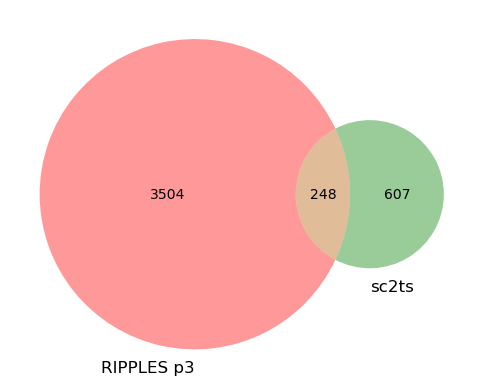

In [14]:
def get_sc2ts_recombinants(df, clade_agreement_threshold=1, closeness=1):
    diffs = df["sc2ts_num_descendants"] - df["usher_num_descendants"]
    clade_agreement = diffs <= clade_agreement_threshold
    print(f"Clade agreement = {clade_agreement.sum()} {clade_agreement.sum() / df.shape[0]:.1%}")
    df = df[clade_agreement]
    close_to_recombinant = df["sc2ts_closest_recombinant_path_len"] <= closeness
    not_recombinant = df["sc2ts_closest_recombinant"] == -1
    print(f"Non recombinant = {not_recombinant.sum() / df.shape[0]:.1%}")
    print(f"Close to recombinant = {close_to_recombinant.sum() / df.shape[0]:.1%}")
    df = df[close_to_recombinant]
    print("Passing filter = ", df.shape[0])
    #print(df["sc2ts_closest_recombinant"].value_counts())
    sc2ts_recombs = df["sc2ts_closest_recombinant"].unique()
    return sc2ts_recombs
    
def draw_venn(df, label, sc2ts_recombs):
    total_ripples = df.shape[0]
    total_sc2ts = 855
    shared = sc2ts_recombs.shape[0]
    print("Total ripples =", total_ripples)
    print("Total sc2ts = ", total_sc2ts)
    matplotlib_venn.venn2([total_ripples - shared, shared, total_sc2ts - shared], [f"RIPPLES {label}", "sc2ts"]);

sc2ts_recombs_p3 = get_sc2ts_recombinants(dfp3, closeness=2)
draw_venn(dfp3, "p3", sc2ts_recombs_p3)

## FIXME

This can't be right - how can we have substantially fewer matching recombination events when we have more events? This needs to be fixed.

Clade agreement = 1052 89.6%
Non recombinant = 41.2%
Close to recombinant = 44.5%
Passing filter =  468
Total ripples = 1174
Total sc2ts =  855


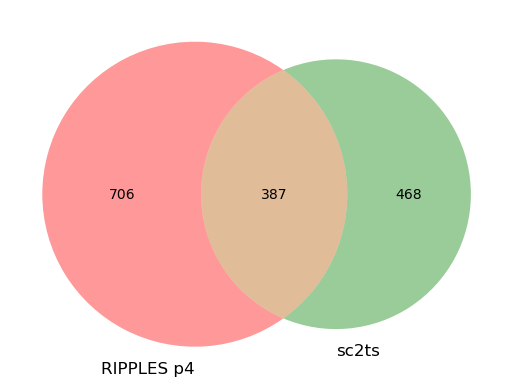

In [15]:
sc2ts_recombs_p4 = get_sc2ts_recombinants(dfp4)
draw_venn(dfp4, "p4", sc2ts_recombs_p4)

In [16]:
dfr = pd.read_csv("../data/recombinants.csv").set_index("recombinant")
dfr

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_pango,parent_mrca_scorpio,parent_mrca_time,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts
recombinant,,,,,,,,,,,,,,,,,,,,,
1280342,ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,2022-06-27,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,5,2,16,False,8
663484,SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,2021-10-21,...,B.1.617.2,Delta (B.1.617.2-like),794.394486,2020-12-19,False,2,2,16,False,5
1356368,ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,2022-08-30,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,4,1,16,False,5
1253364,ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,2022-05-30,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,4,1,54,False,7
1279026,ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,2022-06-26,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,3,2,8,False,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375056,SRR21797337,1,1,1,26276,29729,1,COVID-ARTIC-V4.1,.,2022-09-19,...,BA.2,Omicron (BA.2-like),447.000000,2021-12-01,False,2,22,2,False,5
1373412,SRR21794908,2,1,1,28331,29729,2,COVID-ARTIC-V4.1,.,2022-09-17,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,5,25,2,False,7
1418709,ERR10708209,37,12,1,28682,29729,8,COVID-ARTIC-V4.1,4.1alt,2022-12-17,...,B.1.1.529,Probable Omicron (Unassigned),970.041636,2020-06-26,False,8,23,2,False,10


In [17]:
dfr["ripples_p4"] = {k: k in sc2ts_recombs_p4 for k in dfr.index}
dfr["ripples_p3"] = {k: k in sc2ts_recombs_p3 for k in dfr.index}
dfr

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_time,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,ripples_p4,ripples_p3
recombinant,,,,,,,,,,,,,,,,,,,,,
1280342,ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,2022-06-27,...,970.041636,2020-06-26,False,5,2,16,False,8,False,False
663484,SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,2021-10-21,...,794.394486,2020-12-19,False,2,2,16,False,5,False,True
1356368,ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,2022-08-30,...,970.041636,2020-06-26,False,4,1,16,False,5,False,False
1253364,ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,2022-05-30,...,970.041636,2020-06-26,False,4,1,54,False,7,False,False
1279026,ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,2022-06-26,...,970.041636,2020-06-26,False,3,2,8,False,6,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375056,SRR21797337,1,1,1,26276,29729,1,COVID-ARTIC-V4.1,.,2022-09-19,...,447.000000,2021-12-01,False,2,22,2,False,5,True,True
1373412,SRR21794908,2,1,1,28331,29729,2,COVID-ARTIC-V4.1,.,2022-09-17,...,970.041636,2020-06-26,False,5,25,2,False,7,True,True
1418709,ERR10708209,37,12,1,28682,29729,8,COVID-ARTIC-V4.1,4.1alt,2022-12-17,...,970.041636,2020-06-26,False,8,23,2,False,10,True,True


In [18]:
pango_x_events = pd.read_csv("../data/pango_x_events.csv").set_index("root")
mapping = pango_x_events["pango"].to_dict()
dfr["event_label"] = {k: mapping.get(k, "novel") for k in dfr.index}
dfr


,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,ripples_p4,ripples_p3,event_label
recombinant,,,,,,,,,,,,,,,,,,,,,
1280342,ERR9939974,1,1,1,695,958,1,COVID-ARTIC-V4.1,.,2022-06-27,...,2020-06-26,False,5,2,16,False,8,False,False,novel
663484,SRR20259474,1,1,1,510,1222,1,COVID-AMPLISEQ-V1,.,2021-10-21,...,2020-12-19,False,2,2,16,False,5,False,True,novel
1356368,ERR10219711,2,1,1,695,1453,1,COVID-ARTIC-V4.1,.,2022-08-30,...,2020-06-26,False,4,1,16,False,5,False,False,novel
1253364,ERR9848224,855,1,1,695,1627,1,COVID-ARTIC-V4.1,.,2022-05-30,...,2020-06-26,False,4,1,54,False,7,False,False,novel
1279026,ERR9940192,662,1,1,695,1627,0,COVID-ARTIC-V4.1,.,2022-06-26,...,2020-06-26,False,3,2,8,False,6,False,False,novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375056,SRR21797337,1,1,1,26276,29729,1,COVID-ARTIC-V4.1,.,2022-09-19,...,2021-12-01,False,2,22,2,False,5,True,True,novel
1373412,SRR21794908,2,1,1,28331,29729,2,COVID-ARTIC-V4.1,.,2022-09-17,...,2020-06-26,False,5,25,2,False,7,True,True,novel
1418709,ERR10708209,37,12,1,28682,29729,8,COVID-ARTIC-V4.1,4.1alt,2022-12-17,...,2020-06-26,False,8,23,2,False,10,True,True,novel


In [19]:
dfr[~dfr["ripples_p3"]]["net_min_supporting_loci_lft_rgt_ge_4"].value_counts()

net_min_supporting_loci_lft_rgt_ge_4
False    176
True      72
Name: count, dtype: int64

In [23]:
df_missing_hq = dfr[(~dfr["ripples_p3"]) & (dfr["net_min_supporting_loci_lft_rgt_ge_4"])]
df_missing_hq

,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,ripples_p4,ripples_p3,event_label
recombinant,,,,,,,,,,,,,,,,,,,,,
995727,ERR8495032,5,1,1,4185,4321,0,COVID-ARTIC-V4.1,4.1alt,2022-01-27,...,2020-06-26,True,3,6,44,True,6,False,False,novel
1058654,ERR8691075,154,1,1,4322,5386,0,COVID-ARTIC-V4.1,4.1alt,2022-02-12,...,2020-06-26,True,5,8,43,True,7,False,False,XQ
1057278,SRR20392523,1,1,1,5585,6040,2,COVID-ARTIC-V4.1,.,2022-02-11,...,2020-01-28,True,7,8,82,True,8,False,False,novel
946761,ERR8076129,16,1,1,5387,6402,1,COVID-ARTIC-V4.1,4.1alt,2022-01-13,...,2020-01-28,True,6,6,74,True,6,False,False,XF
369130,ERR6457057,1,1,1,5585,6402,1,COVID-ARTIC-V3,3,2021-07-29,...,2020-07-27,True,4,6,26,True,6,False,False,novel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1341416,SRR21382433,1,1,1,27039,27259,2,COVID-ARTIC-V4.1,.,2022-08-15,...,2022-03-01,True,5,5,4,True,7,False,False,novel
1411996,ERR10666854,1,1,1,23278,27438,2,COVID-ARTIC-V4.1,4.1alt,2022-11-29,...,2022-03-01,True,7,9,6,True,6,False,False,novel
1385832,SRR21909427,2,1,1,27439,27998,0,COVID-ARTIC-V4.1,.,2022-10-03,...,2022-03-01,False,5,12,5,True,5,False,False,novel


In [24]:
df_missing_hq[df_missing_hq["event_label"] != "novel"].sort_values("num_descendant_samples")[["event_label", "num_descendant_samples"]]

,event_label,num_descendant_samples
recombinant,,
1158127,XM,1
938900,XM,1
1083412,XG,3
1379419,XBH,6
946761,XF,16
1291970,XBG,25
1378208,XBD,30
1058654,XQ,154


,sample_id,num_descendant_samples,num_samples,distinct_sample_pango,interval_left,interval_right,num_mutations,Viridian_amplicon_scheme,Artic_primer_version,date_added,...,parent_mrca_date,is_rebar_recombinant,parent_pangonet_distance,net_min_supporting_loci_lft,net_min_supporting_loci_rgt,net_min_supporting_loci_lft_rgt_ge_4,k1000_muts,ripples_p4,ripples_p3,event_label
recombinant,,,,,,,,,,,,,,,,,,,,,
1158127,ERR9447529,1,1,1,21847,22194,0,COVID-ARTIC-V4.1,4.1alt,2022-03-19,...,2020-06-26,True,3,27,17,True,4,False,False,XM
938900,SRR19024311,1,1,1,22205,22673,0,COVID-ARTIC-V4.1,.,2022-01-09,...,2020-06-26,True,3,26,14,True,27,False,False,XM
1083412,ERR9089519,3,1,1,5925,6513,3,COVID-ARTIC-V4.1,4.1alt,2022-02-19,...,2020-06-26,True,3,9,38,True,7,False,False,XG
1379419,ERR10381145,6,1,1,15452,22001,0,COVID-ARTIC-V4.1,4.1alt,2022-09-24,...,2021-11-11,True,3,6,14,True,6,False,False,XBH
946761,ERR8076129,16,1,1,5387,6402,1,COVID-ARTIC-V4.1,4.1alt,2022-01-13,...,2020-01-28,True,6,6,74,True,6,False,False,XF
1187989,SRR20520593,23,1,1,11538,12880,3,COVID-ARTIC-V4.1,.,2022-04-01,...,2020-06-26,True,3,22,31,True,8,False,True,XY
1291970,ERR10000477,25,1,1,22305,22917,2,COVID-ARTIC-V4.1,4.1alt,2022-07-06,...,2021-11-11,True,4,11,15,True,10,False,False,XBG
1378208,SRR21898564,30,1,1,23020,24620,0,COVID-ARTIC-V4.1,.,2022-09-22,...,2021-11-11,True,6,23,12,True,7,False,False,XBD
1159411,ERR9444530,32,1,1,2833,4321,1,COVID-ARTIC-V4.1,4.1alt,2022-03-20,...,2020-06-26,True,4,5,48,True,5,False,True,XW
